In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from numba import njit

from src import *

/home/paul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))
probas_3 = []
probas_4 = []
probas_5 = []
probas_6 = []
probas_7 = []
num_tests = 10000

for size in sizes:
    print(f'size: {size}')
    probas_3.append(measure_success_probability(3, size, num_tests, silent=False))
    probas_4.append(measure_success_probability(4, size, num_tests, silent=False))
    probas_5.append(measure_success_probability(5, size, num_tests, silent=False))
    probas_6.append(measure_success_probability(6, size, num_tests, silent=False))
    probas_7.append(measure_success_probability(7, size, num_tests, silent=False))

print(sizes)
print(probas_3)
print(probas_4)
print(probas_5)
print(probas_6)
print(probas_7)

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
plt.xscale('log')
plt.plot(sizes, probas_3, label='d = 3')
plt.plot(sizes, probas_4, label='d = 4')
plt.plot(sizes, probas_5, label='d = 5')
plt.plot(sizes, probas_6, label='d = 6')
plt.plot(sizes, probas_7, label='d = 7')
plt.legend();
plt.savefig('success_probability_extended.png')

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
plt.xscale('log')
plt.plot(sizes[:14], probas_3, label='d = 3')
plt.plot(sizes[:14], probas_4, label='d = 4')
plt.plot(sizes[:14], probas_5, label='d = 5')
plt.plot(sizes[:14], probas_6, label='d = 6')
plt.plot(sizes[:14], probas_7, label='d = 7')
plt.title('d-regular graphs')
plt.legend();
plt.savefig('success_probability_extended.png')

In [ ]:
#sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))
sizes = np.arange(10, 101, 10).astype(int)

probas_01 = []
probas_05 = []
probas_09 = []
num_tests = 10000

for size in sizes:
    print(f'size: {size}')
    probas_01.append(measure_erdos_renyi(0.1, size, num_tests, silent=False))
    probas_05.append(measure_erdos_renyi(0.5, size, num_tests, silent=False))
    probas_09.append(measure_erdos_renyi(0.5, size, num_tests, silent=False))

print(sizes)
print(probas_01)
print(probas_05)
print(probas_09)

plt.figure(figsize=(10, 7))
# plt.xlim(0.9, 1.4)
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('success probability')
# plt.xscale('log')
plt.plot(sizes, probas_01, label='p = 0.1')
plt.plot(sizes, probas_05, label='p = 0.5')
plt.plot(sizes, probas_09, label='p = 0.9')
plt.title('Erdos-Renyi random graphs')
plt.legend();
plt.savefig('success_probability_erdos_renyi.png')

In [218]:
measure_success_probability(5, 10000, 100, silent=False)

i: 0, num_successes: 0


0.99

In [219]:
measure_success_probability(5, 1000, 100, silent=False)

i: 0, num_successes: 0


0.62

In [ ]:
d = 9
n = 30

for i in range(10000):
    if i % 100 == 0:
        print(i)
        
    graph = nx.random_regular_graph(d, n)
    if not found_partition(graph, 1000):
        print("possible counterexample:")
        nx.draw_networkx(graph, pos=nx.spring_layout(graph))
        plt.show()

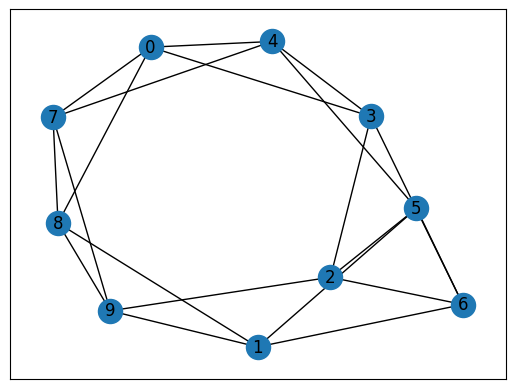

In [190]:
d = 4
n = 10
graph = nx.random_regular_graph(d, n)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

In [ ]:
res, graph = produce_counterexample(11, 28, iterations_thresh=10000, modifications_thresh=10000, silent=False)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

0
100


In [94]:
for i in range(10000):
    if i % 1000 == 0:
        print(i)
    
    res = swap_process(graph)
    if res:
        print(f'cut found at iter {i}')z
        break

0
1000
2000
cut found at iter 2045


In [204]:
def random_regular_bipartite(d, size):
    while True:
        # bip = nx.bipartite.configuration_model([d] * size, [d] * size, create_using=nx.Graph())
        graph = nx.bipartite.configuration_model([1] * size * d, [1] * size * d, create_using=nx.Graph())
        graph = nx.quotient_graph(graph, lambda a, b : (((a < size * d) == (b < size * d)) and abs(a - b) < d))
        if nx.is_regular(graph) and graph.degree(list(graph.nodes())[0]) == d:
            return graph

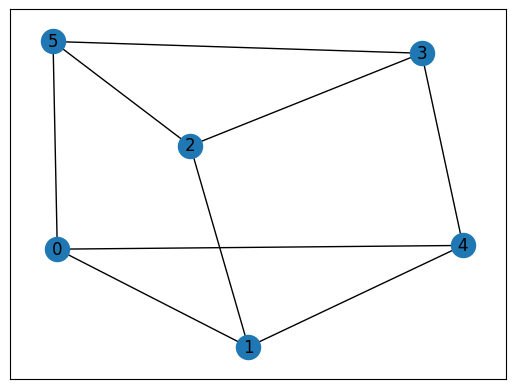

In [27]:
d = 3
num_vxs = 6

graph = nx.random_regular_graph(d, num_vxs)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

In [52]:
cut = np.random.choice([1, -1], size=num_vxs)
print(cut)
print(is_core_in_positive_part(graph, cut, return_core=True))

[-1  1  1  1 -1  1]
(True, array([-1, -1,  1,  1, -1,  1]))


100%|████████████████████████████████████████████████████████████████| 20/20 [00:44<00:00,  2.22s/it]


[  10   20   30   40   50   60   70   80   90  100  100  200  300  400
  500  600  700  800  900 1000]
[0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.2, 0.3, 0.4, 0.3, 0.2, 0.4, 0.1, 0.6, 0.3, 0.2, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0]
[0.4, 0.4, 0.4, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.6, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0]


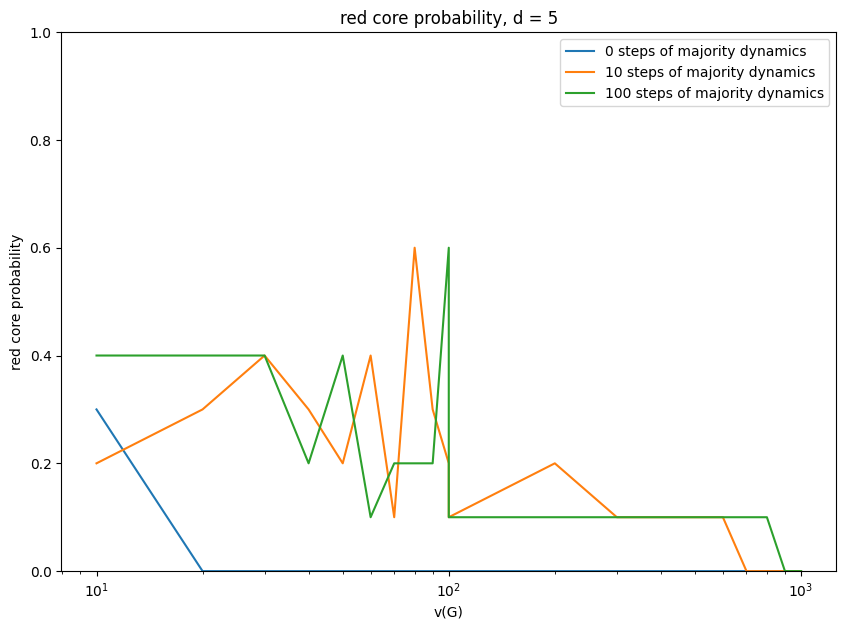

In [14]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(100, 1001, 100)))

probas_0 = []
probas_10 = []
probas_100 = []
#probas_100 = []
num_tests = 10

for size in tqdm(sizes):
    probas_0.append(core_probability(d, size, 0, num_tests, silent=True))
    probas_10.append(core_probability(d, size, 10, num_tests, silent=True))
    probas_100.append(core_probability(d, size, 100, num_tests, silent=True))
    #probas_100.append(core_probability(d, size, 100, num_tests, silent=False))

print(sizes)
print(probas_0)
print(probas_10)
print(probas_100)
#print(probas_100)

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('red core probability')
plt.xscale('log')
plt.plot(sizes, probas_0, label='0 steps of majority dynamics')
plt.plot(sizes, probas_10, label='10 steps of majority dynamics')
plt.plot(sizes, probas_100, label='100 steps of majority dynamics')
#plt.plot(sizes, probas_100, label='100 steps of majority dynamics')
plt.title(f'red core probability, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_{d}.png')

100%|████████████████████████████████████████████████████████████████| 15/15 [08:54<00:00, 35.62s/it]


[  10   20   30   40   50   60   70   80   90  100 1000 2000 3000 4000
 5000]
[0.25, 0.08, 0.03, 0.04, 0.01, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.46, 0.56, 0.61, 0.57, 0.62, 0.58, 0.61, 0.62, 0.71, 0.71, 0.83, 0.89, 0.95, 0.98, 0.99]
[0.53, 0.51, 0.68, 0.54, 0.58, 0.67, 0.63, 0.66, 0.65, 0.74, 0.87, 0.92, 0.95, 0.95, 0.96]
[0.5, 0.57, 0.46, 0.52, 0.47, 0.52, 0.58, 0.51, 0.54, 0.53, 0.44, 0.5, 0.43, 0.5, 0.43]


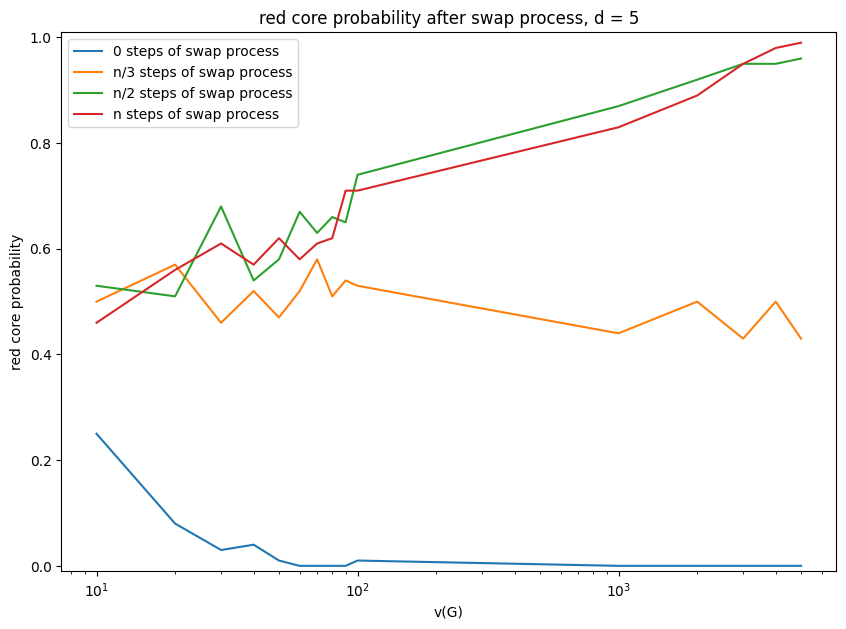

In [3]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 5001, 1000)))

probas_0 = []
probas_1 = []
probas_3 = []
probas_2 = []
num_tests = 100

for size in tqdm(sizes):
    probas_0.append(swap_core_probability(d, size, 0 * size, num_tests, silent=True))
    probas_1.append(swap_core_probability(d, size, 1 * size, num_tests, silent=True))
    probas_3.append(swap_core_probability(d, size, size // 3, num_tests, silent=True))
    probas_2.append(swap_core_probability(d, size, size // 2, num_tests, silent=True))

print(sizes)
print(probas_0)
print(probas_1)
print(probas_2)
print(probas_3)

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('red core probability')
plt.xscale('log')
plt.plot(sizes, probas_0, label='0 steps of swap process')
plt.plot(sizes, probas_3, label='n/3 steps of swap process')
plt.plot(sizes, probas_2, label='n/2 steps of swap process')
plt.plot(sizes, probas_1, label='n steps of swap process')
plt.title(f'red core probability after swap process, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_swap{d}.png')

In [65]:
np.sort(np.hstack((np.arange(0, 1, 0.2), np.arange(0.25, 0.39, 0.05), np.arange(0.31, 0.35, 0.01))))

array([0.  , 0.2 , 0.25, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.4 , 0.6 ,
       0.8 ])

In [63]:
np.arange(0.25, 0.39, 0.05)

array([0.25, 0.3 , 0.35])

100%|███████████████████████████████████████████████████████████████| 15/15 [33:04<00:00, 132.29s/it]


[0.   0.2  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.4  0.6
 0.8 ]
[0.0, 0.0, 0.07, 0.14, 0.33, 0.4, 0.65, 0.75, 0.92, 0.95, 0.96, 0.98, 0.98, 0.99, 1.0]


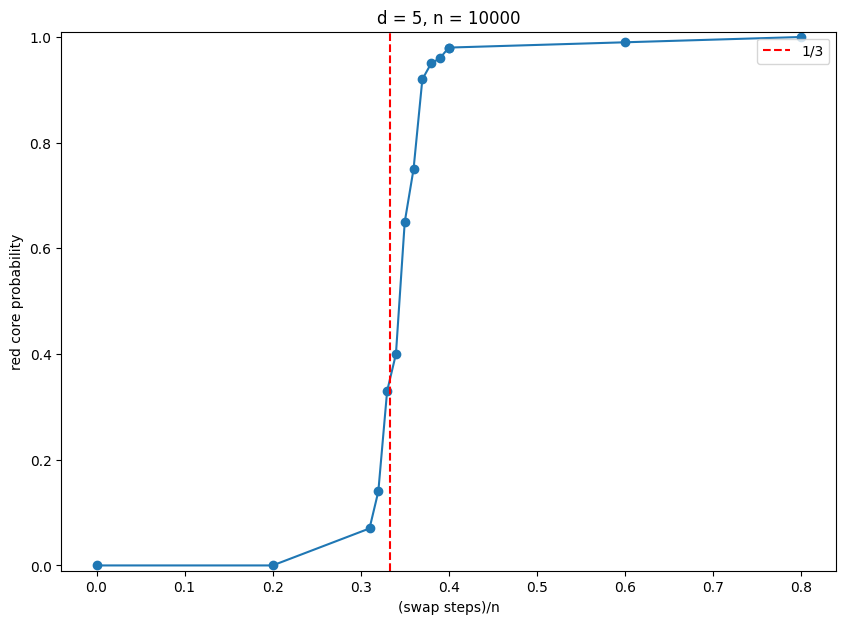

In [6]:
d = 5
num_vxs = 10000
nums_steps = np.sort(np.hstack((np.arange(0, 1, 0.2), np.arange(0.31, 0.4, 0.01))))

probas = []
num_tests = 100

for num_steps in tqdm(nums_steps):
    probas.append(swap_core_probability(d, num_vxs, int(num_steps * num_vxs), num_tests, silent=True))

print(nums_steps)
print(probas)

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('(swap steps)/n')
plt.ylabel('red core probability')
plt.plot(nums_steps, probas)
plt.scatter(nums_steps, probas)
plt.title(f'd = {d}, n = {num_vxs}')
plt.axvline(x=1./3, linestyle='dashed', color='r', label='1/3')
# plt.axvline(x=1./np.pi, linestyle='dashed', color='b', label='1/pi')
plt.legend();
plt.savefig(f'proba_red_core_swap_{d}_{num_vxs}.png')

100%|███████████████████████████████████████████████████████████████| 20/20 [42:46<00:00, 128.31s/it]


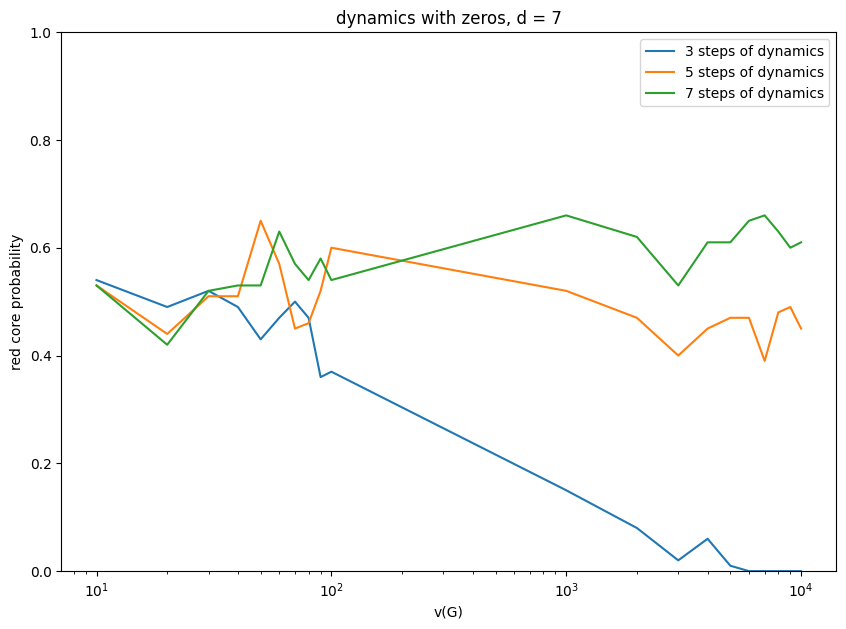

In [4]:
d = 7
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))

probas_3 = []
probas_5 = []
probas_7 = []
num_tests = 100

for size in tqdm(sizes):
    probas_3.append(core_probability_with_zeros(d, size, 3, num_tests, silent=True))
    probas_5.append(core_probability_with_zeros(d, size, 5, num_tests, silent=True))
    probas_7.append(core_probability_with_zeros(d, size, 7, num_tests, silent=True))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('red core probability')
plt.xscale('log')
plt.plot(sizes, probas_3, label='3 steps of dynamics')
plt.plot(sizes, probas_5, label='5 steps of dynamics')
plt.plot(sizes, probas_7, label='7 steps of dynamics')
plt.title(f'dynamics with zeros, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_with_zeros_{d}.png')

100%|████████████████████████████████████████████████████████████████| 20/20 [01:51<00:00,  5.57s/it]


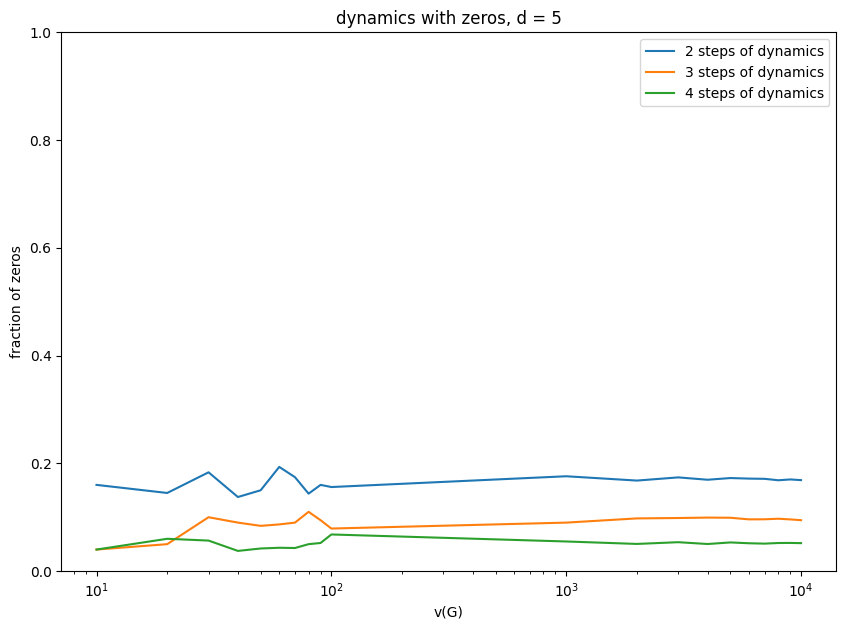

In [2]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 10001, 1000)))

probas_2 = []
probas_3 = []
probas_4 = []
num_tests = 10

for size in tqdm(sizes):
    probas_2.append(zeros_fraction_with_zeros(d, size, 2, num_tests, silent=True))
    probas_3.append(zeros_fraction_with_zeros(d, size, 3, num_tests, silent=True))
    probas_4.append(zeros_fraction_with_zeros(d, size, 4, num_tests, silent=True))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('fraction of zeros')
plt.xscale('log')
plt.plot(sizes, probas_2, label='2 steps of dynamics')
plt.plot(sizes, probas_3, label='3 steps of dynamics')
plt.plot(sizes, probas_4, label='4 steps of dynamics')
plt.title(f'dynamics with zeros, d = {d}')
plt.legend();
plt.savefig(f'zero_fraction_with_zeros_{d}.png')

100%|████████████████████████████████████████████████████████████████| 15/15 [06:17<00:00, 25.16s/it]


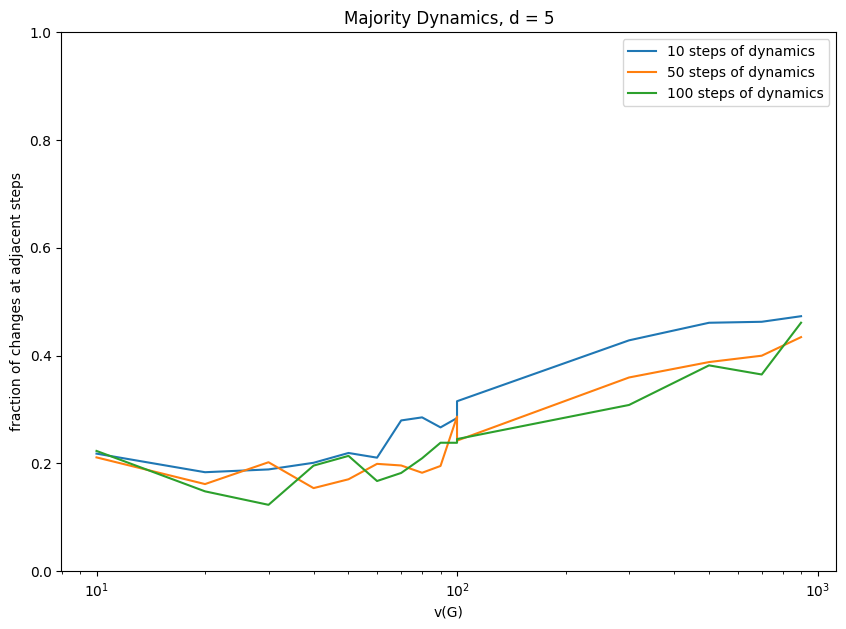

In [3]:
d = 5
# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(100, 1001, 200)))

probas_10 = []
probas_50 = []
probas_100 = []
num_tests = 100

for size in tqdm(sizes):
    probas_10.append(changing_fraction_md(d, size, 10, num_tests, silent=True))
    probas_50.append(changing_fraction_md(d, size, 50, num_tests, silent=True))
    probas_100.append(changing_fraction_md(d, size, 100, num_tests, silent=True))

plt.figure(figsize=(10, 7))
plt.ylim(0, 1)
plt.xlabel('v(G)')
plt.ylabel('fraction of changes at adjacent steps')
plt.xscale('log')
plt.plot(sizes, probas_10, label='10 steps of dynamics')
plt.plot(sizes, probas_50, label='50 steps of dynamics')
plt.plot(sizes, probas_100, label='100 steps of dynamics')
plt.title(f'Majority Dynamics, d = {d}')
plt.legend();
plt.savefig(f'changing_fraction_md_{d}.png')

100%|████████████████████████████████████████████████████████████████| 20/20 [01:20<00:00,  4.02s/it]


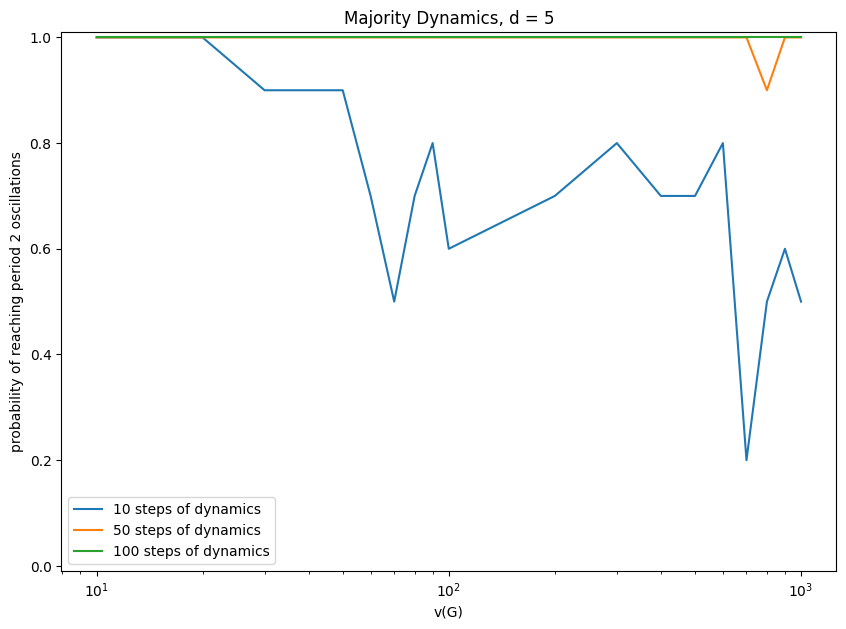

In [6]:
d = 5

# sizes = np.arange(10, 101, 10).astype(int)
sizes = np.hstack((np.arange(10, 101, 10), np.arange(100, 1001, 100)))

probas_10 = []
probas_50 = []
probas_100 = []
num_tests = 10

for size in tqdm(sizes):
    probas_10.append(proba_oscillations_md(d, size, 10, num_tests, silent=True))
    probas_50.append(proba_oscillations_md(d, size, 50, num_tests, silent=True))
    probas_100.append(proba_oscillations_md(d, size, 100, num_tests, silent=True))

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('probability of reaching period 2 oscillations')
plt.xscale('log')
plt.plot(sizes, probas_10, label='10 steps of dynamics')
plt.plot(sizes, probas_50, label='50 steps of dynamics')
plt.plot(sizes, probas_100, label='100 steps of dynamics')
plt.title(f'Majority Dynamics, d = {d}')
plt.legend();
plt.savefig(f'oscillation_proba_md_{d}.png')

100%|████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.46it/s]


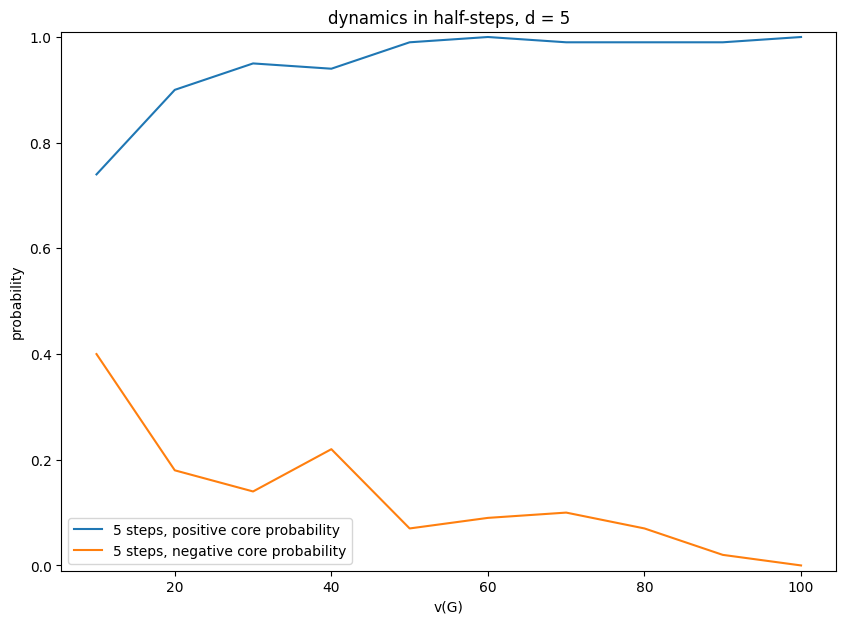

In [6]:
d = 5
sizes = np.arange(10, 101, 10).astype(int)
# sizes = np.hstack((np.arange(10, 101, 10), np.arange(1000, 5001, 1000)))

probas_1_pos = []
probas_1_neg = []
num_tests = 100

for size in tqdm(sizes):
    p_1_pos, p_1_neg = core_probability_in_halves(d, size, 5, num_tests, silent=True)
    probas_1_pos.append(p_1_pos)
    probas_1_neg.append(p_1_neg)

plt.figure(figsize=(10, 7))
plt.ylim(-0.01, 1.01)
plt.xlabel('v(G)')
plt.ylabel('probability')
# plt.xscale('log')
plt.plot(sizes, probas_1_pos, label='5 steps, positive core probability')
plt.plot(sizes, probas_1_neg, label='5 steps, negative core probability')
plt.title(f'dynamics in half-steps, d = {d}')
plt.legend();
plt.savefig(f'proba_red_core_in_halves_{d}.png')

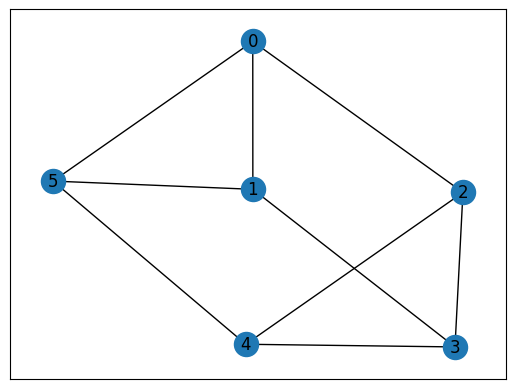

In [2]:
d = 3
num_vxs = 6

graph = nx.random_regular_graph(d, num_vxs)
nx.draw_networkx(graph, pos=nx.spring_layout(graph))

In [6]:
cut = np.random.choice([-1, 1], size = num_vxs)
cut

array([-1,  1,  1, -1, -1, -1])

In [7]:
adj_matrix = nx.to_numpy_array(graph, nodelist=range(num_vxs))

In [8]:
print(np.max(np.vstack((np.zeros_like(cut), adj_matrix @ cut)), axis=0))
print(clip(cut + 2 * np.max(np.vstack((np.zeros_like(cut), adj_matrix @ cut)), axis=0)))

[1. 0. 0. 1. 0. 0.]
[ 1  1  1  1 -1 -1]


In [13]:
cut = majority_dynamics_step_in_halves(graph, cut)
cut

array([1, 1, 1, 1, 1, 1])

In [12]:
n = 15
p = 0.2
num_tests = 10000;
num_dyn_steps = 15;

for i in tqdm(range(num_tests)):
    graph = nx.erdos_renyi_graph(n, p)
    
    cut = np.random.choice([1, -1], size=n)
    for j in range(num_dyn_steps):
        cut = majority_dynamics_step(graph, cut)
    cut_copy = cut.copy()
    cut = majority_dynamics_step(graph, cut)
    cut = majority_dynamics_step(graph, cut)
    
    if not np.array_equal(cut, cut_copy):
        print(cut)
        print(cut_copy)
        nx.draw_networkx(graph, pos=nx.spring_layout(graph))
        plt.show()

100%|████████████████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1152.32it/s]
